# Personal Information
Name: **Wout Gerdes**

StudentID: **15018997**

Email: [**wout.gerdes@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **22.03.2024**

Github link: **https://github.com/wgerdes/Thesis**

# Data Context
**In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.**

The PaySim dataset is a synthetic dataset generated by PaySim, a mobile money simulation platform designed to mimic the transaction activities in a mobile money system. It was created for research purposes and is freely available for academic use. The dataset simulates a mobile money transfer network, capturing various aspects of financial transactions, such as transfers, cash withdrawals, deposits, and purchases.

The data includes information about the origin and destination of transactions, transaction types, transaction amounts, balances before and after transactions, timestamps, and flags indicating fraudulent transactions. It is a well-studies dataset due to its similarities to "real-world" fraud and amount of data. Also, many other algorithms and projects have been run on this dataset, allowing for ease of comparison in performance between studies.

An extra dataset for peace of mind is deemed unnecessary due to the vast amount of research using the PaySim dataset, including recent studies at the UvA in a similar task.

# Data Description

**Present here the results of your exploratory data analysis. Note that there is no need to have a "story line" - it is more important that you show your understanding of the data and the methods that you will be using in your experiments (i.e. your methodology).**

**As an example, you could show data, label, or group balances, skewness, and basic characterizations of the data. Information about data frequency and distributions as well as results from reduction mechanisms such as PCA could be useful. Furthermore, indicate outliers and how/why you are taking them out of your samples, if you do so.**

**The idea is, that you conduct this analysis to a) understand the data better but b) also to verify the shapes of the distributions and whether they meet the assumptions of the methods that you will attempt to use. Finally, make good use of images, diagrams, and tables to showcase what information you have extracted from your data.**

In [1]:
!pip install -r requirements.txt

In [2]:
# Imports
import os
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [3]:
df = pd.read_csv('../paysim.csv')

### Analysis 1: 
Observing the dataframe

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
# Big difference between isFlaggedFraud fraud and isFraud
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [8]:
# Checking value counts in fraud column
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
# As we can see, the dataset is very imbalanced
fraud_counts = df['isFraud'].value_counts()
total_count = fraud_counts.sum()

percentage_0 = (fraud_counts[0] / total_count) * 100
percentage_1 = (fraud_counts[1] / total_count) * 100

# Print the percentages
print(f"Percentage of 'isFraud' = 0: {percentage_0:.2f}%")
print(f"Percentage of 'isFraud' = 1: {percentage_1:.2f}%")

Percentage of 'isFraud' = 0: 99.87%
Percentage of 'isFraud' = 1: 0.13%


In [10]:
# Check for null
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# Check for duplicates
df.duplicated().sum()

0

In [12]:
# Quick statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [13]:
# Type check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Analysis 2:
Visual analysis

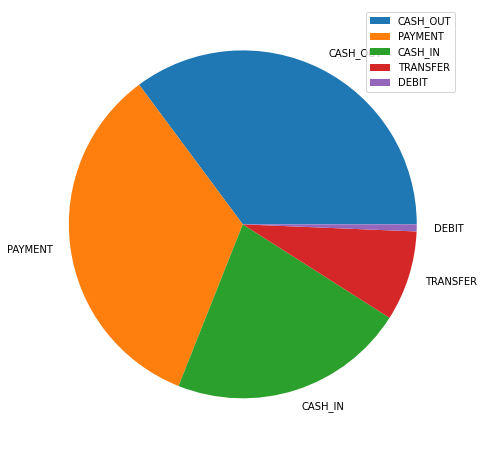

In [14]:
# Show the NUMBER of transactions per type in the dataset 
type = df['type'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction)
plt.legend(loc='upper right')
plt.show()

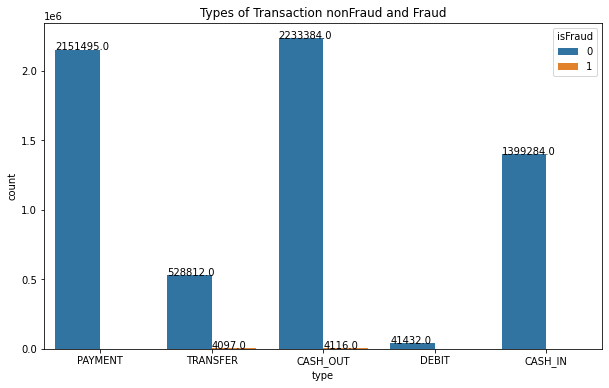

In [15]:
# Plots the AMOUNT of FRAUD versus notFRAUD per type of transaction
plt.figure(figsize=(10,6))
ax=sns.countplot(x = "type", hue="isFraud", data = df)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

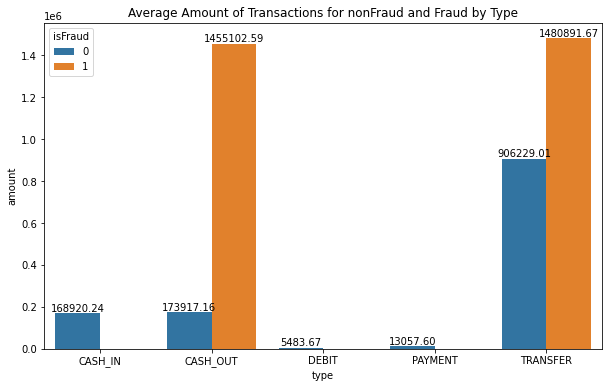

In [16]:
# Plot the AVERAGE amount per transaction for FRAUD and NONFRAUD 
plt.figure(figsize=(10,6))
ax = sns.barplot(x="type", y="amount", hue="isFraud", data=df.groupby(["type", "isFraud"])["amount"].mean().reset_index())
plt.title('Average Amount of Transactions for nonFraud and Fraud by Type')

# Annotate with average transaction amounts
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

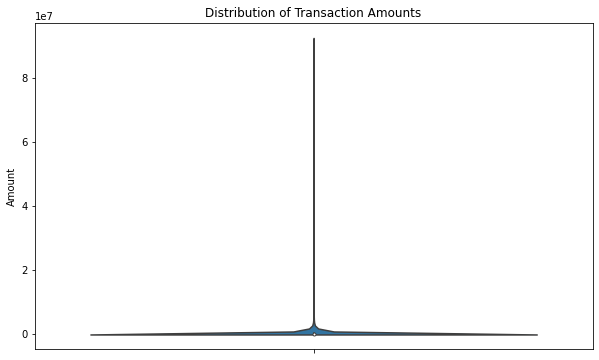

In [17]:
# Violin plot showing the distribution of the TRANSACTION AMOUNT for all types and FRAUD/NONFRAUD
# Distribution is very skewed, and needs further analysis
plt.figure(figsize=(10, 6))
sns.violinplot(y="amount", data=df)
plt.title('Distribution of Transaction Amounts')
plt.ylabel('Amount')
plt.show()

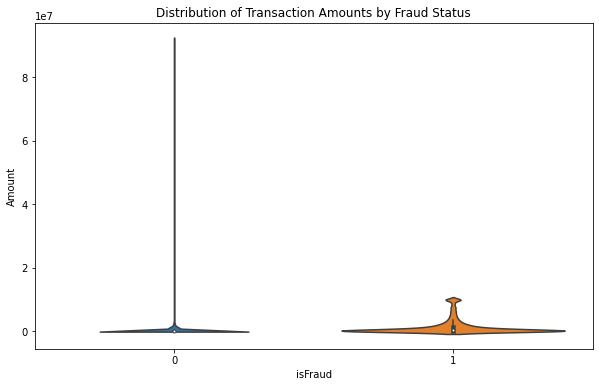

In [18]:
# Violin plots of TRANSACTION AMOUNT per FRAUD or NON FRAUD
# Indicates a different distribution in fraudulent vs non fraudulent transactions, but this should be further investigated based on type
plt.figure(figsize=(10, 6))
sns.violinplot(x="isFraud", y="amount", data=df)
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.xlabel('isFraud')
plt.ylabel('Amount')
plt.show()

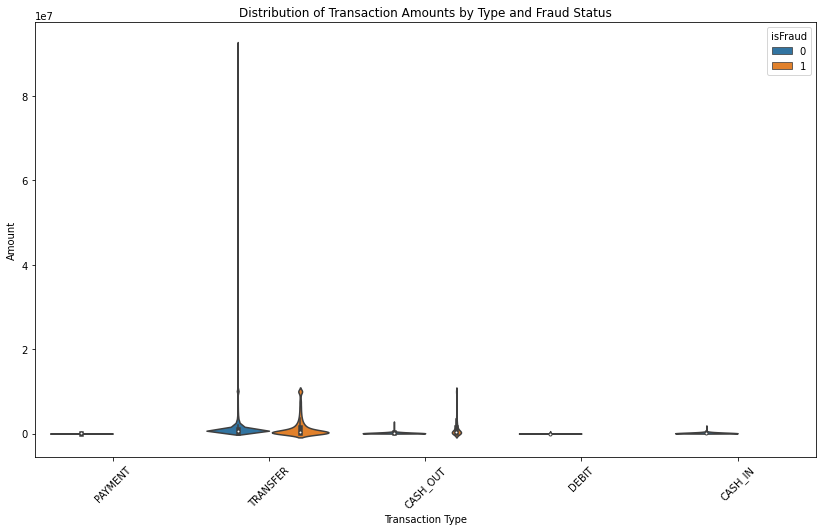

In [19]:
# Showing violin plots for types and is fraud
# Hard to read figure, will be viewed more in depth later
plt.figure(figsize=(14, 8))
sns.violinplot(x="type", y="amount", hue="isFraud", data=df)
plt.title('Distribution of Transaction Amounts by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.legend(title='isFraud', loc='upper right')
plt.xticks(rotation=45)
plt.show()

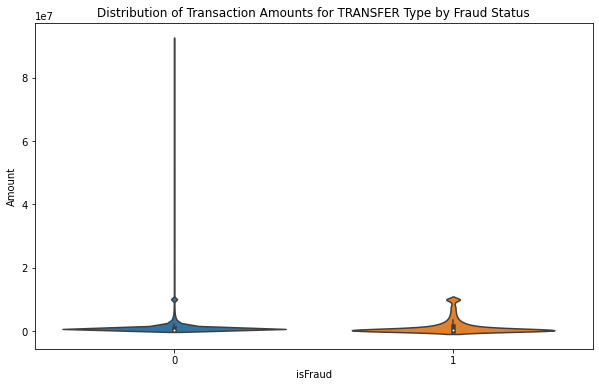

In [20]:
# Violin plot of FRAUD and NON FRAUD in only TRANSFER type transactions
# Indicates interesting difference in distribution of transaction amount
plt.figure(figsize=(10, 6))

# Filter the DataFrame for transactions of type 'TRANSFER'
transfer_df = df[df['type'] == 'TRANSFER']

# Create the violin plot
sns.violinplot(x="isFraud", y="amount", data=transfer_df)
plt.title('Distribution of Transaction Amounts for TRANSFER Type by Fraud Status')
plt.xlabel('isFraud')
plt.ylabel('Amount')
plt.show()

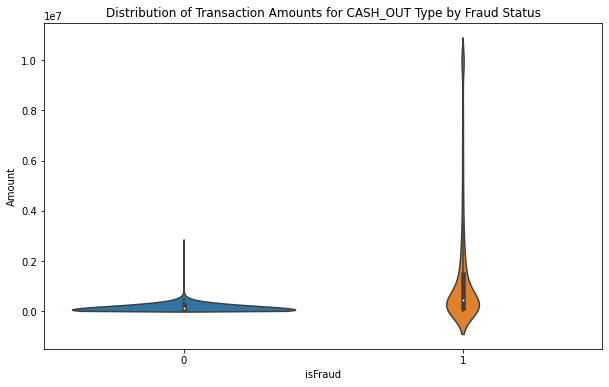

In [21]:
# Violin plot of FRAUD and NON FRAUD in only CASH OUT type transactions
# Indicates interesting difference in distribution of transaction amount

plt.figure(figsize=(10, 6))

# Filter the DataFrame for transactions of type 'CASH_OUT'
cash_out_df = df[df['type'] == 'CASH_OUT']

# Create the violin plot
sns.violinplot(x="isFraud", y="amount", data=cash_out_df)
plt.title('Distribution of Transaction Amounts for CASH_OUT Type by Fraud Status')
plt.xlabel('isFraud')
plt.ylabel('Amount')
plt.show()

### Analysis 3:
Only transfer and cash_out type have fraudulent transactions. Therefore, we zoom in on these types

In [22]:
# Create fraud and valid DF for analysis
fraud = df[df["isFraud"] == 1]
valid = df[df["isFraud"] == 0]

In [23]:
fraud_transfer = fraud[fraud["type"] == "TRANSFER"]
fraud_cashout = fraud[fraud["type"] == "CASH_OUT"]

# checking if the recipient account of a fraudulent transfer was used as a sending account for cashing out 
fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

In [24]:
#We derive a new feature Transaction Type2 from these features account types "C" (customer) and "M" (merchant), 
#which would be the first character for each value under nameOrig and nameDest.

#We will create a categorical variable with levels "CC" (Customer to Customer), 
#"CM" (Customer to Merchant), "MC" (Merchant to Customer), "MM" (Merchant to Merchant).

data_new = df.copy() # creating copy for security
data_new["Type2"] = np.nan # initializing feature column

# filling feature column
data_new.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('C'),"Type2"] = "CC" 
data_new.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('M'),"Type2"] = "CM"
data_new.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'),"Type2"] = "MC"
data_new.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('M'),"Type2"] = "MM"

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

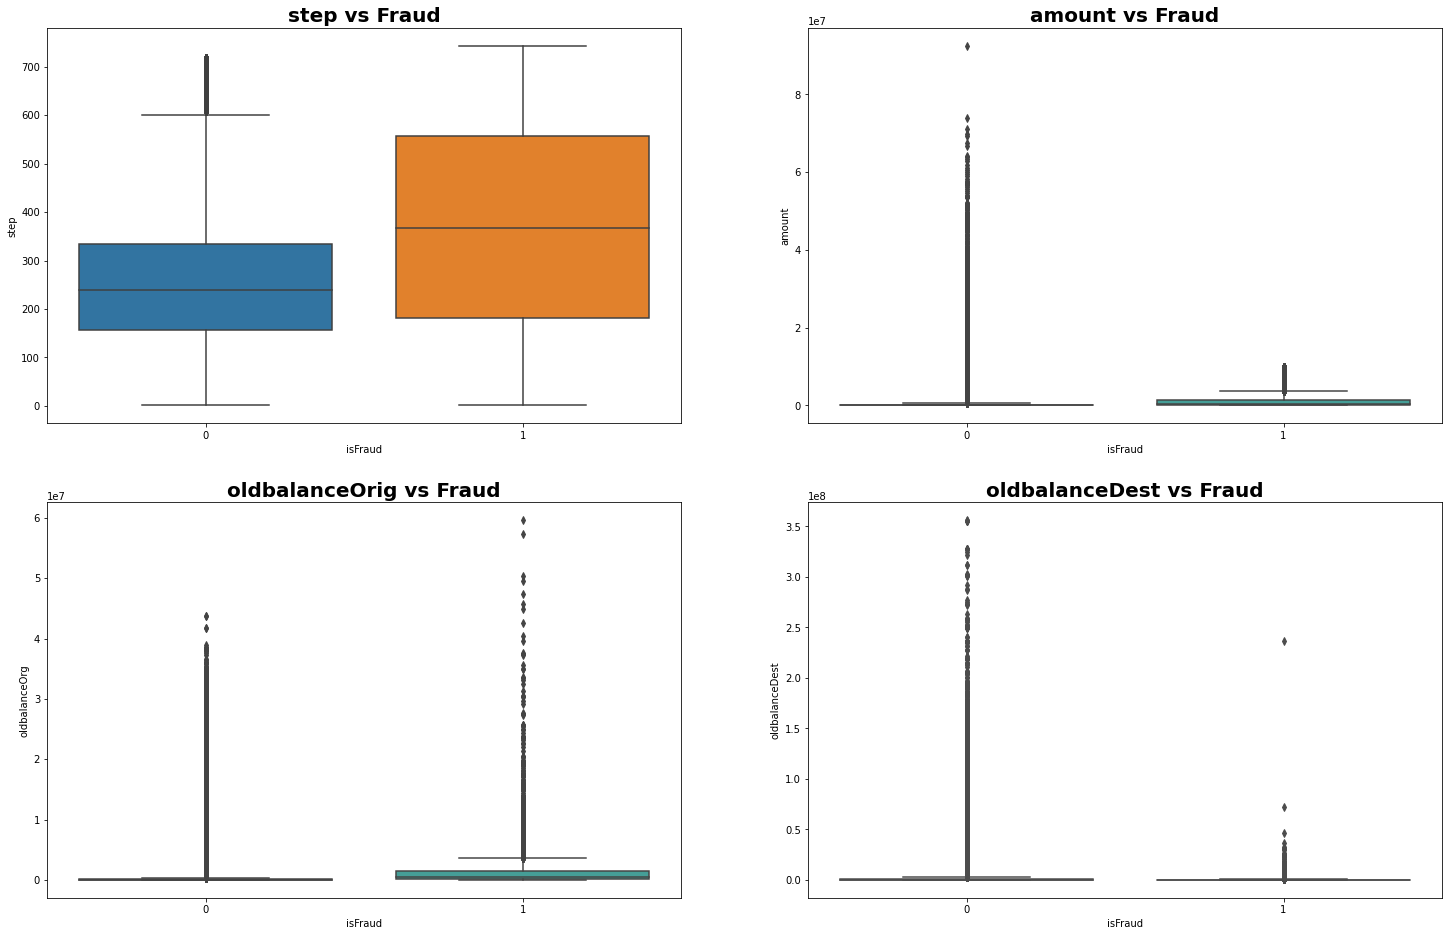

In [25]:
# Plotting the differences in FRAUD and NON FRAUD datasets next to each other, based on multiple interesting features
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = data_new)
plt.title('step vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = data_new,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = data_new, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = data_new,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

In [26]:
fraud = data_new[data_new["isFraud"] == 1]
valid = data_new[data_new["isFraud"] == 0]

In [27]:
print("Fraud transactions by type1: \n",fraud.Type2.value_counts())
print("\n Valid transactions by type1: \n",valid.Type2.value_counts())

Fraud transactions by type1: 
 CC    8213
Name: Type2, dtype: int64

 Valid transactions by type1: 
 CC    4202912
CM    2151495
Name: Type2, dtype: int64


In [28]:
# Checking for discrepancies in balances, both in incoming and outgoing accounts
wrong_orig_bal = sum(df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"])
wrong_dest_bal = sum(df["newbalanceDest"] + df["amount"] != df["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(df),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(df),2))

Percentage of observations with balance errors in the account giving money:  85.0
Percentage of observations with balance errors in the account receiving money:  100.0


### Analysis 4:
Analysis of transactions in the time dimension

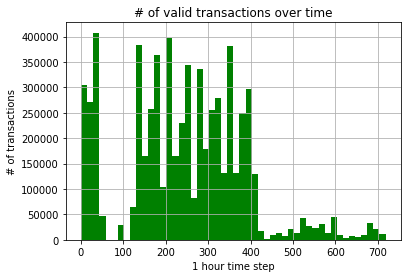

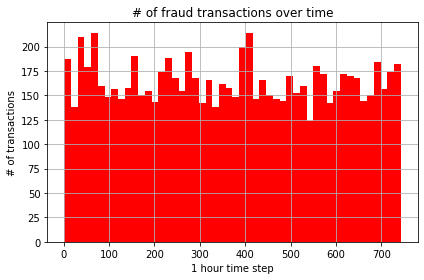

In [29]:
#Time analysis, plotting FRAUD and NON FRAUD transactions over time

bins = 50

valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()

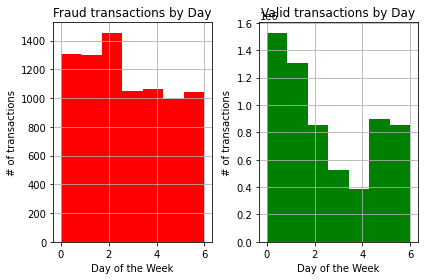

In [30]:
#Dividing the time bins into DAYS and HOURS, allowing analysis of different DAYS of the WEEK for FRAUD vs NON FRAUD
num_days = 7
num_hours = 24
fraud_days = (fraud.step//num_hours)% num_days
fraud_hours = fraud.step % num_hours
valid_days = (valid.step//num_hours) % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

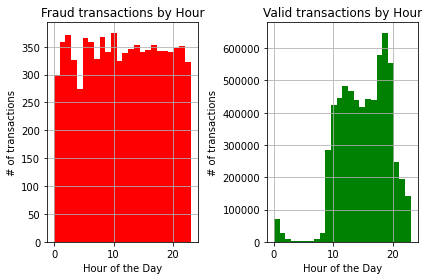

In [31]:
# Using the division into HOURS to analyse FRAUD vs NON FRAUD transactions per hour of a day
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()